## Modélisation

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns 
import sklearn 
import matplotlib.pyplot as plt 

import scipy.stats as ss
from scipy.stats import chi2_contingency
from matplotlib.colors import to_hex
from seaborn import color_palette

In [74]:
df = pd.read_csv('C:/Users/andre/SIAD/M2SIAD/Sem1/MLOps/df_clean.csv')
df.head()

,activite_emprunteur,activite_emprunteur_bus,activite_salle_etude,activite_utilisateur_postes_informatiques,activite_utilisateur_wifi,tranches_d_age_2,roubaisien_ou_non,nom_de_l_iris_a_roubaix,commune_de_residence,inscription_carte,nombre_d_annees_d_adhesion,type_inscription,sexe
0,Emprunteur,Non emprunteur Zèbre,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,25 - 64 ans,Non Roubaisien,Inconnu,GRUSON,Médiathèque,15.0,gratuite,Femme
1,Emprunteur,Non emprunteur Zèbre,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,15 - 24 ans,Roubaisien,FRESNOY,ROUBAIX,Médiathèque,9.0,gratuite,Homme
2,Emprunteur,Non emprunteur Zèbre,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,0 - 14 ans,Roubaisien,TROIS PONTS SUD,ROUBAIX,Médiathèque,8.0,gratuite,Femme
3,Emprunteur,Non emprunteur Zèbre,Non utilisateur Salle d'étude,Utilisateur postes informatiques,Utilisateur Wifi,25 - 64 ans,Roubaisien,TRICHON,ROUBAIX,Médiathèque Plus (Personnel médiathèque),9.0,payante,Femme
4,Emprunteur,Non emprunteur Zèbre,Non utilisateur Salle d'étude,Non utilisateur postes informatiques,Non utilisateur Wifi,25 - 64 ans,Non Roubaisien,Inconnu,HEM,Médiathèque,8.0,gratuite,Homme


## 1 - Rappel sur les données

In [75]:
# Nombre d'observations et de variables
np.shape(df)

(11650, 13)

In [78]:
df.info

<bound method DataFrame.info of       activite_emprunteur activite_emprunteur_bus  \
0              Emprunteur    Non emprunteur Zèbre   
1              Emprunteur    Non emprunteur Zèbre   
2              Emprunteur    Non emprunteur Zèbre   
3              Emprunteur    Non emprunteur Zèbre   
4              Emprunteur    Non emprunteur Zèbre   
...                   ...                     ...   
11645      Non emprunteur    Non emprunteur Zèbre   
11646          Emprunteur    Non emprunteur Zèbre   
11647      Non emprunteur    Non emprunteur Zèbre   
11648          Emprunteur    Non emprunteur Zèbre   
11649      Non emprunteur    Non emprunteur Zèbre   

                activite_salle_etude  \
0      Non utilisateur Salle d'étude   
1      Non utilisateur Salle d'étude   
2      Non utilisateur Salle d'étude   
3      Non utilisateur Salle d'étude   
4      Non utilisateur Salle d'étude   
...                              ...   
11645      Utilisateur Salle d'étude   
11646  Non 

In [79]:
print(df.columns)

Index(['activite_emprunteur', 'activite_emprunteur_bus',
       'activite_salle_etude', 'activite_utilisateur_postes_informatiques',
       'activite_utilisateur_wifi', 'tranches_d_age_2', 'roubaisien_ou_non',
       'nom_de_l_iris_a_roubaix', 'commune_de_residence', 'inscription_carte',
       'nombre_d_annees_d_adhesion', 'type_inscription', 'sexe'],
      dtype='object')


In [44]:
df.describe()

,nombre_d_annees_d_adhesion
count,11650.000000
mean,4.255193
std,4.461030
min,0.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,15.000000


In [45]:
df.isnull().sum()

activite_emprunteur                          0
activite_emprunteur_bus                      0
activite_salle_etude                         0
activite_utilisateur_postes_informatiques    0
activite_utilisateur_wifi                    0
tranches_d_age_2                             0
roubaisien_ou_non                            0
nom_de_l_iris_a_roubaix                      0
commune_de_residence                         0
inscription_carte                            0
nombre_d_annees_d_adhesion                   0
type_inscription                             0
sexe                                         0
dtype: int64

## 2 - Manipulations préalables à la modélisation

In [46]:
df = df.drop("commune_de_residence",axis=1)
df = df.drop("nom_de_l_iris_a_roubaix",axis=1)
df = df.drop("activite_emprunteur_bus",axis=1)
df = df.drop("activite_salle_etude",axis=1)
df = df.drop("activite_utilisateur_postes_informatiques",axis=1)
df = df.drop("activite_utilisateur_wifi",axis=1)

In [47]:
print(df.columns)

Index(['activite_emprunteur', 'tranches_d_age_2', 'roubaisien_ou_non',
       'inscription_carte', 'nombre_d_annees_d_adhesion', 'type_inscription',
       'sexe'],
      dtype='object')


#### Transformation des variables catégégorielles en variables dummies

In [48]:
dummies = pd.get_dummies(df,columns=['activite_emprunteur', 'tranches_d_age_2', 'roubaisien_ou_non',
       'inscription_carte', 'nombre_d_annees_d_adhesion', 'type_inscription',
       'sexe'], drop_first=True)
dummies.head(10)

,activite_emprunteur_Non emprunteur,tranches_d_age_2_15 - 24 ans,tranches_d_age_2_25 - 64 ans,tranches_d_age_2_65 ans et plus,tranches_d_age_2_Inconnu,roubaisien_ou_non_Roubaisien,inscription_carte_Collectivités (Classes maternelles et primaires),inscription_carte_Collectivités (Structures non scolaires),inscription_carte_Consultation sur place,inscription_carte_Médiathèque,...,nombre_d_annees_d_adhesion_10.0,nombre_d_annees_d_adhesion_11.0,nombre_d_annees_d_adhesion_12.0,nombre_d_annees_d_adhesion_13.0,nombre_d_annees_d_adhesion_14.0,nombre_d_annees_d_adhesion_15.0,type_inscription_payante,sexe_Homme,sexe_NC,sexe_NP
0,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,False,True,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
5,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
6,True,True,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
7,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
8,True,True,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
9,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


In [49]:
def label_nonemp(nonemp):
    if nonemp == True :
        return False
    if nonemp == False:
        return True

dummies['activite_emprunteur_Emprunteur'] = dummies['activite_emprunteur_Non emprunteur'].apply(label_nonemp)
dummies.head(10)

,activite_emprunteur_Non emprunteur,tranches_d_age_2_15 - 24 ans,tranches_d_age_2_25 - 64 ans,tranches_d_age_2_65 ans et plus,tranches_d_age_2_Inconnu,roubaisien_ou_non_Roubaisien,inscription_carte_Collectivités (Classes maternelles et primaires),inscription_carte_Collectivités (Structures non scolaires),inscription_carte_Consultation sur place,inscription_carte_Médiathèque,...,nombre_d_annees_d_adhesion_11.0,nombre_d_annees_d_adhesion_12.0,nombre_d_annees_d_adhesion_13.0,nombre_d_annees_d_adhesion_14.0,nombre_d_annees_d_adhesion_15.0,type_inscription_payante,sexe_Homme,sexe_NC,sexe_NP,activite_emprunteur_Emprunteur
0,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
1,False,True,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
5,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
6,True,True,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
7,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
8,True,True,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
9,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True


In [50]:
data = dummies.drop("activite_emprunteur_Non emprunteur",axis=1)

In [52]:
dummies = data.astype(int)
dummies.head(10)

,tranches_d_age_2_15 - 24 ans,tranches_d_age_2_25 - 64 ans,tranches_d_age_2_65 ans et plus,tranches_d_age_2_Inconnu,roubaisien_ou_non_Roubaisien,inscription_carte_Collectivités (Classes maternelles et primaires),inscription_carte_Collectivités (Structures non scolaires),inscription_carte_Consultation sur place,inscription_carte_Médiathèque,inscription_carte_Médiathèque Plus (17 €),...,nombre_d_annees_d_adhesion_11.0,nombre_d_annees_d_adhesion_12.0,nombre_d_annees_d_adhesion_13.0,nombre_d_annees_d_adhesion_14.0,nombre_d_annees_d_adhesion_15.0,type_inscription_payante,sexe_Homme,sexe_NC,sexe_NP,activite_emprunteur_Emprunteur
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
6,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [53]:
dummies["activite_emprunteur_Emprunteur"].value_counts()

activite_emprunteur_Emprunteur
1    7095
0    4555
Name: count, dtype: int64

#### Echantillon test et echantillon d'apprentissage

In [54]:
from sklearn.model_selection import train_test_split
dummiesTrain, dummiesTest = train_test_split(dummies, test_size=0.3)
print("la taille de la base d'apprentissage est",dummiesTrain.shape)
print("la taille de la base de test est",dummiesTest.shape)

# séparation des variables explicatives et de la variable à prédire

XTrain = dummiesTrain.drop("activite_emprunteur_Emprunteur",axis=1)
XTest = dummiesTest.drop("activite_emprunteur_Emprunteur",axis=1)

YTrain = dummiesTrain["activite_emprunteur_Emprunteur"]
YTest = dummiesTest["activite_emprunteur_Emprunteur"]

la taille de la base d'apprentissage est (8155, 35)
la taille de la base de test est (3495, 35)


In [73]:
dummiesTest["activite_emprunteur_Emprunteur"].value_counts()

activite_emprunteur_Emprunteur
1    2114
0    1381
Name: count, dtype: int64

#### Taux d'erreur minimale au tirage aléatoire

In [55]:
vect1 = np.ones(8155)
TestError = np.mean(vect1!=YTrain)
print("\n l'erreur de test vaut: ",TestError)


 l'erreur de test vaut:  0.38920907418761497


In [56]:
vect = np.zeros(8155)
TestError = np.mean(vect!=YTrain)
print("l'erreur de test vaut:",TestError)

l'erreur de test vaut: 0.610790925812385


Le meilleur classifieur constant est celui qui a l'erreur de test minimale, on prend le classifieur qui prédit 0, avec un taux d'erreur de 38.92 %.

## 3 - Modélisation : Régression logistique

#### Le modèle

In [57]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [59]:
# Séparer les données d'entraînement et de test en supprimant la colonne cible
XTrainD = dummiesTrain.drop("activite_emprunteur_Emprunteur", axis=1)
XTestD = dummiesTest.drop("activite_emprunteur_Emprunteur", axis=1)

# Assurer que YTestD est un tableau unidimensionnel
YTestD = dummiesTest["activite_emprunteur_Emprunteur"].values

# Initialiser le modèle de régression logistique
lr = LogisticRegression(solver='liblinear')
modele = lr.fit(XTrainD, dummiesTrain["activite_emprunteur_Emprunteur"])

# Obtenir la probabilité de la classe positive
y_prob = lr.predict_proba(XTestD)[:, 1]

# Créer un vecteur de prédictions basé sur des seuils de probabilité
y_pred = np.where(y_prob > 0.5, 1, 0)

# Calculer la courbe ROC et l'aire sous la courbe ROC (ROC AUC)
false_positive_rate, true_positive_rate, thresholds = roc_curve(YTestD, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("L'aire sous la courbe ROC est de:", roc_auc)

# Comparaison avec les données de test
TestError = np.mean(YTestD != y_pred)
print("L'erreur sur la base de test est de :", TestError)
print("Le taux de bon classement est de :", 1 - TestError)

# Matrice de confusion
Table = confusion_matrix(YTestD, y_pred)
print("Matrice de confusion :\n", Table)

L'aire sous la courbe ROC est de: 0.7396217897030725
L'erreur sur la base de test est de : 0.2915593705293276
Le taux de bon classement est de : 0.7084406294706724
Matrice de confusion :
 [[ 572  809]
 [ 210 1904]]


**Aire sous la courbe ROC (AUROC)** : 0.7396
- L'Aire sous la courbe ROC mesure la capacité d'un modèle à distinguer entre les classes. Elle varie de 0 à 1, où 1 indique une performance parfaite. Une valeur de 0.7681 suggère que le modèle a une capacité modérée à bonne à discriminer entre les classes.

**Erreur sur la base de test** : 0.2915
- L'erreur sur la base de test représente la proportion d'observations mal classées par le modèle. Dans notre cas, environ 27.1% des prédictions du modèle sont incorrectes.

**Taux de bon classement** : 0.7084
- Le taux de bon classement est le complément de l'erreur. Dans notre cas, environ 72.90% des prédictions sont correctes.

**Matrice de confusion** : La matrice de confusion résume les performances du modèle en termes de vrais positifs (TP), faux positifs (FP), vrais négatifs (TN) et faux négatifs (FN) :
- 572 vrais négatifs (TN) : observations correctement classées comme négatives.
- 809 faux positifs (FP) : observations incorrectement classées comme positives.
- 210 faux négatifs (FN) : observations incorrectement classées comme négatives.
- 1904 vrais positifs (TP) : observations correctement classées comme positives.

**Sensibilité (Recall ou True Positive Rate)** : 1904 / (1904 + 210) ≈ 0.90
- Proportion des vrais positifs parmi toutes les observations réellement positives. Mesure la capacité du modèle à détecter les cas positifs.

**Précision** : 1904 / (1904 + 809) ≈ 0.70
- Proportion des vrais positifs parmi toutes les observations prédites comme positives. Mesure la précision du modèle parmi ses prédictions positives.

In [60]:
from sklearn import metrics
cm = metrics.confusion_matrix(YTestD,y_pred)
print(cm)

[[ 572  809]
 [ 210 1904]]


In [61]:
score = lr.score(XTestD, YTestD)
print(score)

0.7084406294706724


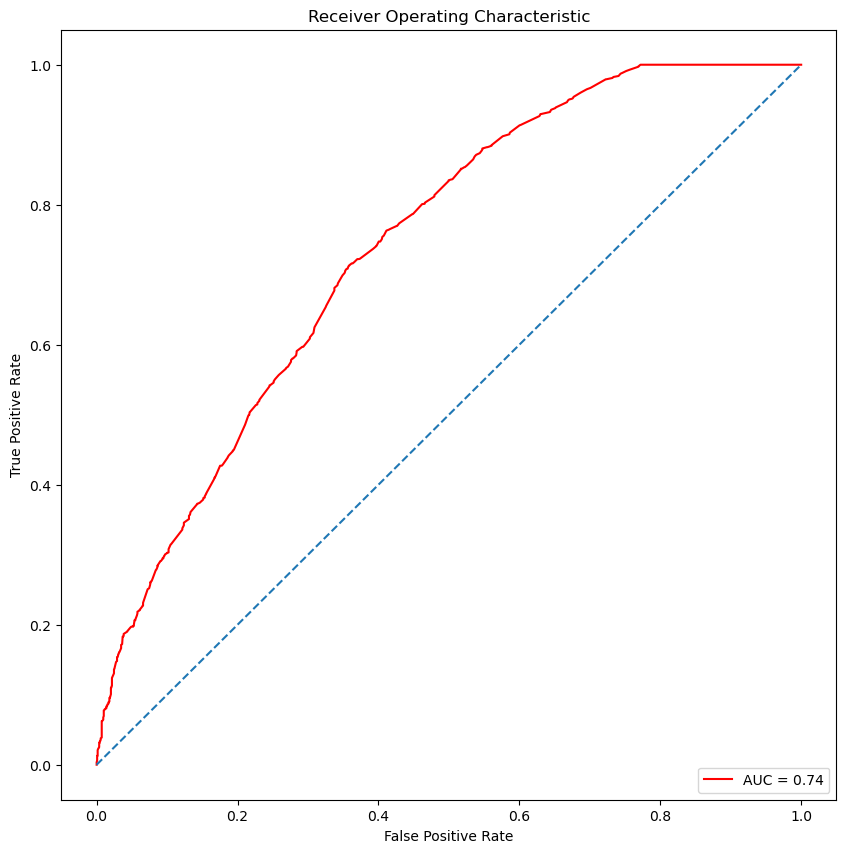

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')

# Tracer la courbe ROC et afficher l'aire sous la courbe (AUC)
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Validation croisée

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [65]:
# Initialiser le modèle de régression logistique avec le solveur 'liblinear'
lr = LogisticRegression(solver = 'liblinear')

# Définir les paramètres à rechercher avec la grille de recherche
params = {'C': np.logspace(-1, 1, 3), 'penalty': ['l1', 'l2']}

# Séparer les données d'entraînement en features (XTrainD) et variable cible (YTrainD)
XTrainD = dummiesTrain.drop("activite_emprunteur_Emprunteur", axis=1)
YTrainD = dummiesTrain["activite_emprunteur_Emprunteur"].values  
# Initialiser la grille de recherche avec le modèle et les paramètres définis
lr_gs = GridSearchCV(lr, params, cv=10)

# Effectuer la recherche sur la grille avec les données d'entraînement
lr_gs.fit(XTrainD,YTrainD)

print(lr_gs.best_params_)

{'C': 10.0, 'penalty': 'l2'}


#### Modèle régression logistique optimisé

In [66]:
lr2 = LogisticRegression(solver = 'liblinear',penalty = 'l2',C = 10.0)

modele = lr2.fit(XTrainD,YTrainD)

# On récupère la prédiction de la valeur positive
y_prob = lr2.predict_proba(XTestD)[:,1] 

# On créé un vecteur de prédiction à partir du vecteur de probabilités
y_pred = np.where(y_prob > 0.5, 1, 0) 

false_positive_rate, true_positive_rate, thresholds = roc_curve(YTestD, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("L'aire sous la courbe ROC est de:", roc_auc)

# Comparaison avec les données test
TestError = np.mean(YTestD!=y_pred)
print("L'erreur de test est de :",TestError)
print("L taux de bon classement est de :", 1-TestError)

# Matrice de confusion
Table = sklearn.metrics.confusion_matrix(YTestD,y_pred)
print("Matrice de confusion :\n",Table)

L'aire sous la courbe ROC est de: 0.739462854786236
L'erreur de test est de : 0.2892703862660944
L taux de bon classement est de : 0.7107296137339056
Matrice de confusion :
 [[ 585  796]
 [ 215 1899]]


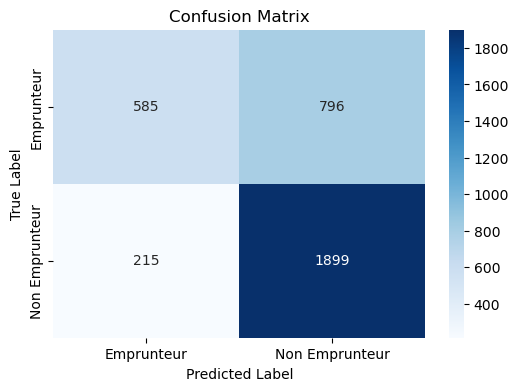

In [67]:
# Matricede confusion modèle logistique optimisé
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de confusion
conf_matrix = np.array([[585, 796],
                        [215, 1899]])

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt="d", 
            cmap="Blues", 
            xticklabels=['Emprunteur', 'Non Emprunteur'], 
            yticklabels=['Emprunteur', 'Non Emprunteur'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [68]:
from sklearn import metrics
cm = metrics.confusion_matrix(YTestD,y_pred)
print(cm)

[[ 585  796]
 [ 215 1899]]


In [69]:
score = lr2.score(XTestD, YTestD)
print(score)

0.7107296137339055


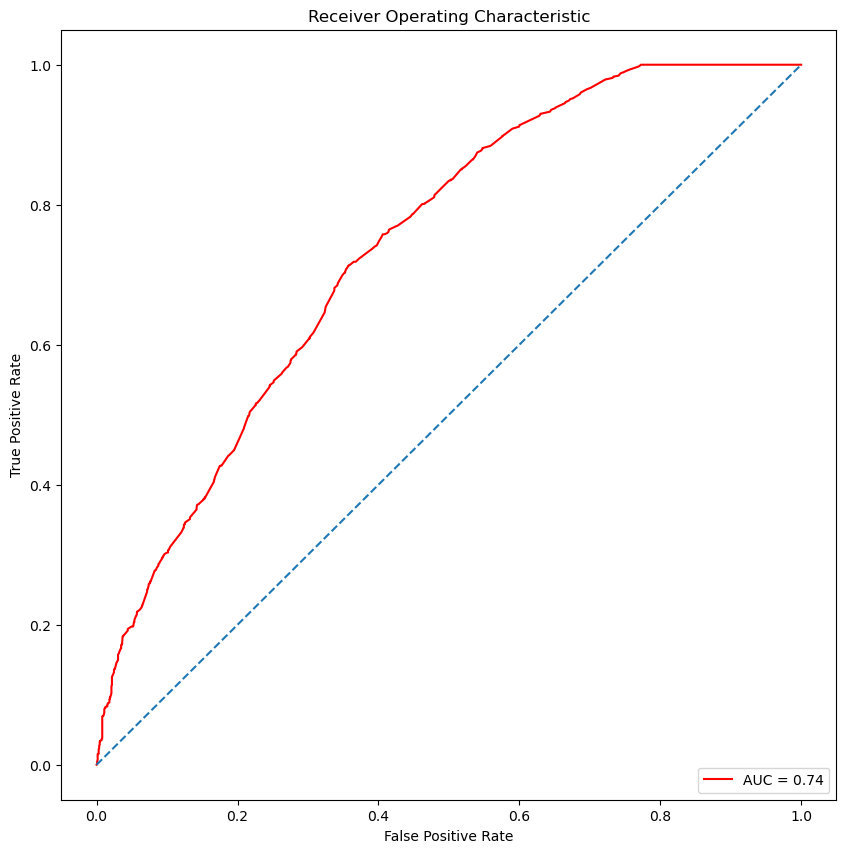

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [71]:
import pandas as pd
import statsmodels.api as sm

y = dummies['activite_emprunteur_Emprunteur']
X = dummies.drop(['activite_emprunteur_Emprunteur'], axis=1)

# Ajouter une constante aux variables indépendantes
X = sm.add_constant(X)

logit_model = sm.Logit(y, X)

result = logit_model.fit()

print(result.summary())

#  R² de McFadden
mcfadden_r2 = 1 - (result.llf / result.llnull)
print(f"McFadden's R²: {mcfadden_r2}")

# Test de Wald
wald_test = result.wald_test(np.eye(len(result.params)))
print("Wald Test:")
print(wald_test)

# Teste de Significativité Globale
overall_test = result.wald_test(np.eye(len(result.params)), use_f=False)
print("Overall Significance Test:")
print(overall_test)

         Current function value: 0.546875
         Iterations: 35
                                 Logit Regression Results                                 
Dep. Variable:     activite_emprunteur_Emprunteur   No. Observations:                11650
Model:                                      Logit   Df Residuals:                    11616
Method:                                       MLE   Df Model:                           33
Date:                            Sat, 23 Dec 2023   Pseudo R-squ.:                  0.1828
Time:                                    00:06:46   Log-Likelihood:                -6371.1
converged:                                  False   LL-Null:                       -7796.0
Covariance Type:                        nonrobust   LLR p-value:                     0.000
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 35, but rank is 4
  warnings.warn('covariance of constraints does not have full '
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 35, but rank is 4
  wa

In [72]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                 
==========================================================================================
Dep. Variable:     activite_emprunteur_Emprunteur   No. Observations:                11650
Model:                                      Logit   Df Residuals:                    11616
Method:                                       MLE   Df Model:                           33
Date:                            Sat, 23 Dec 2023   Pseudo R-squ.:                  0.1828
Time:                                    00:07:06   Log-Likelihood:                -6371.1
converged:                                  False   LL-Null:                       -7796.0
Covariance Type:                        nonrobust   LLR p-value:                     0.000
======================================================================================================================================
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
const                                                                 -4.0579   5.96e+05  -6.81e-06      1.000   -1.17e+06    1.17e+06
tranches_d_age_2_15 - 24 ans                                          -1.2180      0.062    -19.680      0.000      -1.339      -1.097
tranches_d_age_2_25 - 64 ans                                          -0.6106      0.054    -11.305      0.000      -0.716      -0.505
tranches_d_age_2_65 ans et plus                                       -0.3566      0.097     -3.675      0.000      -0.547      -0.166
tranches_d_age_2_Inconnu                                              -1.0927      1.257     -0.869      0.385      -3.557       1.372
roubaisien_ou_non_Roubaisien                                          -0.4216      0.051     -8.302      0.000      -0.521      -0.322
inscription_carte_Collectivités (Classes maternelles et primaires)     0.1005      0.876      0.115      0.909      -1.616       1.817
inscription_carte_Collectivités (Structures non scolaires)            -0.0454      1.046     -0.043      0.965      -2.096       2.005
inscription_carte_Consultation sur place                             -23.5780   5.99e+05  -3.93e-05      1.000   -1.17e+06    1.17e+06
inscription_carte_Médiathèque                                          5.7389   5.96e+05   9.63e-06      1.000   -1.17e+06    1.17e+06
inscription_carte_Médiathèque Plus (17 €)                              1.4428   8.51e+06   1.69e-07      1.000   -1.67e+07    1.67e+07
inscription_carte_Médiathèque Plus (35 €)                              1.8418   8.51e+06   2.16e-07      1.000   -1.67e+07    1.67e+07
inscription_carte_Médiathèque Plus (5 €)                               1.0624   8.51e+06   1.25e-07      1.000   -1.67e+07    1.67e+07
inscription_carte_Médiathèque Plus (Conservatoire)                     0.2541   8.51e+06   2.98e-08      1.000   -1.67e+07    1.67e+07
inscription_carte_Médiathèque Plus (Personnel médiathèque)             1.1295   8.51e+06   1.33e-07      1.000   -1.67e+07    1.67e+07
inscription_carte_Prêt en nombre                                      -2.0057      0.905     -2.217      0.027      -3.779      -0.232
nombre_d_annees_d_adhesion_1.0                                        -0.3961      0.074     -5.353      0.000      -0.541      -0.251
nombre_d_annees_d_adhesion_2.0                                        -0.2459      0.080     -3.073      0.002      -0.403      -0.089
nombre_d_annees_d_adhesion_3.0                                        -0.3080      0.084     -3.660      0.000      -0.473      -0.143
nombre_d_annees_d_adhesion_4.0                                        -0.3844      0.089     -4.301      0.000      -0.560      -0.209
nombre_d_annees_d_adhesion_5

In [78]:
conda env export > conda.yaml


Note: you may need to restart the kernel to use updated packages.
